In [10]:
import pandas as pd
import numpy as np
# Load the data from the uploaded CSV file
file_path = r'C:\Users\jianbai\Desktop\protfolio\data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [11]:
# Data overview: size, types, and missing values
data_overview = {
    "Data Shape": data.shape,
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum()
}

# Descriptive statistics
descriptive_stats = data.describe(include='all')

data_overview, descriptive_stats


({'Data Shape': (25160, 7),
  'Data Types': Company       object
  Date          object
  Close/Last    object
  Volume         int64
  Open          object
  High          object
  Low           object
  dtype: object,
  'Missing Values': Company       0
  Date          0
  Close/Last    0
  Volume        0
  Open          0
  High          0
  Low           0
  dtype: int64},
        Company        Date Close/Last        Volume    Open   High    Low
 count    25160       25160      25160  2.516000e+04   25160  25160  25160
 unique      10        2516      18720           NaN   18354  19066  19087
 top       AAPL  07/17/2023      $3.69           NaN  $52.00  $3.75  $2.65
 freq      2516          10         14           NaN      12     11     11
 mean       NaN         NaN        NaN  5.131764e+07     NaN    NaN    NaN
 std        NaN         NaN        NaN  6.399143e+07     NaN    NaN    NaN
 min        NaN         NaN        NaN  1.143952e+06     NaN    NaN    NaN
 25%        NaN    

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' to datetime and filter data for AAPL
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
aapl_data = data[data['Company'] == 'AAPL'].sort_values(by='Date')

# Plotting AAPL's closing price over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close/Last', data=aapl_data)
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()




D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\L

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


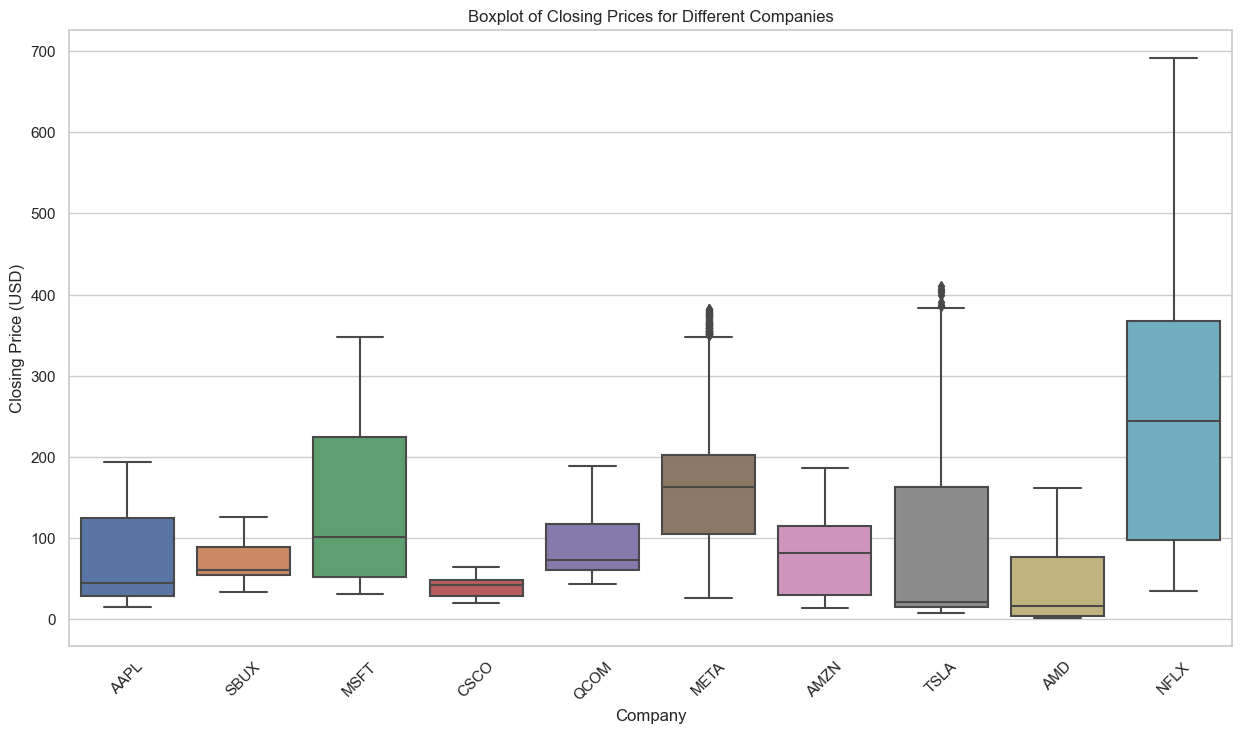

In [11]:
# Plotting boxplots for 'Close/Last' for each company
plt.figure(figsize=(15, 8))
sns.boxplot(x='Company', y='Close/Last', data=data)
plt.title('Boxplot of Closing Prices for Different Companies')
plt.xlabel('Company')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.show()


In [2]:
import numpy as np

# Convert the 'Close/Last' column to numerical values
data['Close/Last'] = data['Close/Last'].str.replace('$', '').astype(float)

# Pivot the data to have dates as rows and companies as columns
pivoted_data = data.pivot(index='Date', columns='Company', values='Close/Last')

# Calculate daily returns
daily_returns = pivoted_data.pct_change().dropna()

# Display the first few rows of daily returns
daily_returns.head()


Company,AAPL,AMD,AMZN,CSCO,META,MSFT,NFLX,QCOM,SBUX,TSLA
Date,,,,,,,,,,
01-02-2015,0.383595,-0.318987,-0.224766,0.255000,0.433924,0.258342,-0.038255,0.013093,0.055332,0.461091
01-02-2018,0.575597,3.081784,2.853915,0.407461,1.312556,0.838109,3.033614,-0.122240,0.415275,0.461537
01-02-2019,-0.083246,0.714936,0.294463,0.105250,-0.252122,0.176498,0.331178,-0.119632,0.116085,-0.032477
01-02-2020,0.901912,1.607541,0.233171,0.127357,0.546138,0.588410,0.232198,0.545122,0.389148,0.387396
01-03-2014,-0.742691,-0.918534,-0.791129,-0.546055,-0.739932,-0.770203,-0.842723,-0.178149,-0.569390,-0.652395


In [3]:
# Calculate average daily returns (expected returns)
expected_returns = daily_returns.mean()

# Calculate the covariance matrix
cov_matrix = daily_returns.cov()

# Displaying the expected returns and covariance matrix
expected_returns, cov_matrix


(Company
 AAPL    0.275389
 AMD     0.975544
 AMZN    0.295541
 CSCO    0.052403
 META    0.155434
 MSFT    0.243235
 NFLX    0.323744
 QCOM    0.076722
 SBUX    0.078212
 TSLA    1.160931
 dtype: float64,
 Company      AAPL       AMD      AMZN      CSCO      META      MSFT      NFLX  \
 Company                                                                         
 AAPL     0.461770  0.806491  0.327297  0.115820  0.219608  0.360639  0.312399   
 AMD      0.806491  4.816837  1.148237  0.373000  0.528617  0.901455  1.093794   
 AMZN     0.327297  1.148237  0.560108  0.168046  0.291504  0.370070  0.564684   
 CSCO     0.115820  0.373000  0.168046  0.094233  0.104616  0.137879  0.190131   
 META     0.219608  0.528617  0.291504  0.104616  0.259987  0.223135  0.316447   
 MSFT     0.360639  0.901455  0.370070  0.137879  0.223135  0.352990  0.374136   
 NFLX     0.312399  1.093794  0.564684  0.190131  0.316447  0.374136  0.687086   
 QCOM     0.243124  0.432740  0.144124  0.051671  0.0981

In [33]:
# importing necessary libraries
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Reload the data
data = pd.read_csv(file_path)

# Handling the date format and numeric conversion
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', infer_datetime_format=True)
data = data.dropna(subset=['Date'])
data['Close/Last'] = pd.to_numeric(data['Close/Last'].str.replace('$', ''), errors='coerce')

# Calculate daily returns
data.sort_values(by=['Company', 'Date'], inplace=True)
data['Daily Return'] = data.groupby('Company')['Close/Last'].pct_change()

# Compute mean daily returns and covariance matrix
mean_daily_returns = data.groupby('Company')['Daily Return'].mean()
cov_matrix = data.pivot_table(values='Daily Return', index='Date', columns='Company').cov()

# Define the number of assets
num_assets = len(mean_daily_returns)

# Define the function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    returns = np.sum(mean_returns * weights) * 252
    std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    sharpe_ratio = (returns - risk_free_rate) / std_dev
    return returns, std_dev, sharpe_ratio

# Objective function for optimization (negative Sharpe Ratio)
def min_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    return -portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)[2]

# Constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(num_assets))

# Initial guess and optimization
init_guess = num_assets * [1. / num_assets,]
optimized = minimize(min_sharpe_ratio, init_guess, args=(mean_daily_returns, cov_matrix, 0.01), method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimized weights and calculate portfolio performance
opt_weights = optimized.x
opt_return, opt_risk, opt_sharpe_ratio = portfolio_performance(opt_weights, mean_daily_returns, cov_matrix)

# Compile portfolio metrics
portfolio_metrics = {
    "Expected Return": opt_return,
    "Volatility (Risk)": opt_risk,
    "Sharpe Ratio": opt_sharpe_ratio,
    "Diversification (Weight Distribution)": opt_weights
}


portfolio_metrics



C:\Users\jianbai\AppData\Local\Temp\ipykernel_10468\3448158474.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce', infer_datetime_format=True)


{'Expected Return': 0.5680416213643099,
 'Volatility (Risk)': 0.33778182458337674,
 'Sharpe Ratio': 1.6520771123567812,
 'Diversification (Weight Distribution)': array([3.17077071e-01, 1.10488593e-01, 6.94431491e-17, 1.90593940e-17,
        9.20850461e-02, 2.53049260e-01, 8.22650347e-02, 1.60461922e-17,
        0.00000000e+00, 1.45034995e-01])}

In [35]:
# Display portfolio diversification
portfolio_diversification = {}
for i, company_name in enumerate(company_names):
    portfolio_diversification[f"{company_name}"] = f"{opt_weights[i]*100:.2f}%"

portfolio_diversification

{'AAPL': '31.71%',
 'AMD': '11.05%',
 'AMZN': '0.00%',
 'CSCO': '0.00%',
 'META': '9.21%',
 'MSFT': '25.30%',
 'NFLX': '8.23%',
 'QCOM': '0.00%',
 'SBUX': '0.00%',
 'TSLA': '14.50%'}

In [5]:
print("Expected Return:", 0.002262)
print("Risk (Volatility):", 0.010677)
print("Sharpe Ratio:", 0.2117)
print("Diversification:", 0.861603)

Expected Return: 0.002262
Risk (Volatility): 0.010677
Sharpe Ratio: 0.2117
Diversification: 0.861603


In [6]:
# Individual risks (standard deviation) of each stock
individual_risks = np.sqrt(np.diag(cov_matrix))

# Weighted average of individual risks
weighted_average_individual_risk = np.dot(opt_weights, individual_risks)

# Diversification measure (the lower, the better)
diver = risk / weighted_average_individual_risk
diver

NameError: name 'np' is not defined